<a href="https://colab.research.google.com/github/gktjdwns/autonomous_curriculum/blob/main/CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

169001437/169001437 [==============================] - 2s 0us/step


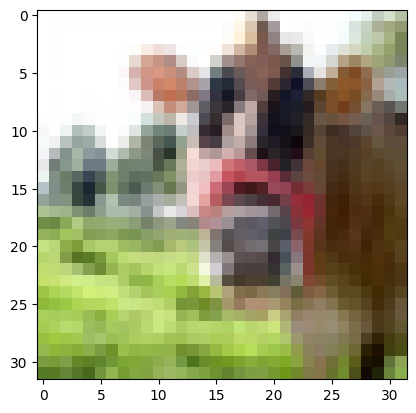

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]]


In [19]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

plt.imshow(train_images[0])
plt.show()

print(train_images[0])

train_images, test_images = train_images / 255.0, test_images / 255.0


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100,activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 75s 47ms/step - loss: 3.9342 - accuracy: 0.0992
Epoch 2/5
1563/1563 [==============================] - 73s 47ms/step - loss: 3.2618 - accuracy: 0.2065
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 2.9620 - accuracy: 0.2643
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 2.7662 - accuracy: 0.3026
Epoch 5/5
1563/1563 [==============================] - 74s 47ms/step - loss: 2.6157 - accuracy: 0.3353


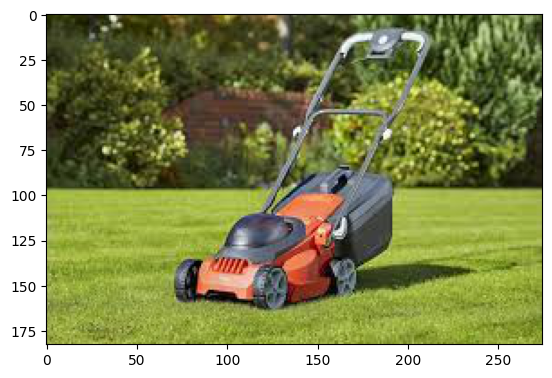

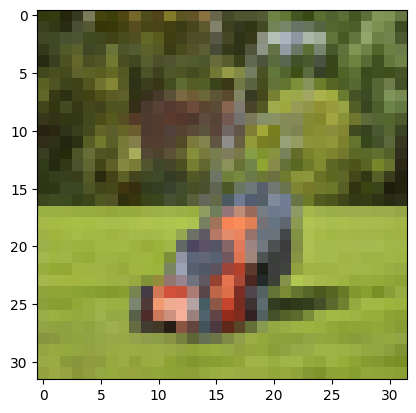

1/1 [==============================] - 0s 24ms/step
lawn_mower


In [25]:
img = Image.open('/content/drive/MyDrive/apple/lawn_mower.jpg')
plt.imshow(img)
plt.show()

img = img.resize((32, 32))

plt.imshow(img)
plt.show()

input_img = np.asarray(img).reshape(1, 32, 32, 3) / 255.0

prediction = model.predict(input_img)
predicted_class = np.argmax(prediction)

classes = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose",
    "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar",
    "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout",
    "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]


print(classes[predicted_class])